In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
import requests
from utils import TextAccessor
import uuid

In [5]:
datasets = Path().cwd().parent/"Datasets"/"Scrapper"

In [7]:
directories = list(datasets.iterdir())
print(directories[0])

c:\Users\froro\OneDrive\Escritorio\personal_project\Proyectos\comidaCHAT\Datasets\Scrapper\Chilena


## My colombian

In [8]:
csv = directories[0].glob("*.csv")
values = pd.concat(map(pd.read_csv, csv))

In [9]:
values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        913 non-null    object 
 1   date         0 non-null      float64
 2   url          913 non-null    object 
 3   ingredients  913 non-null    object 
 4   steps        910 non-null    object 
dtypes: float64(1), object(4)
memory usage: 42.8+ KB


In [10]:
my_colombian = values[["title","url", "ingredients", "steps"]]

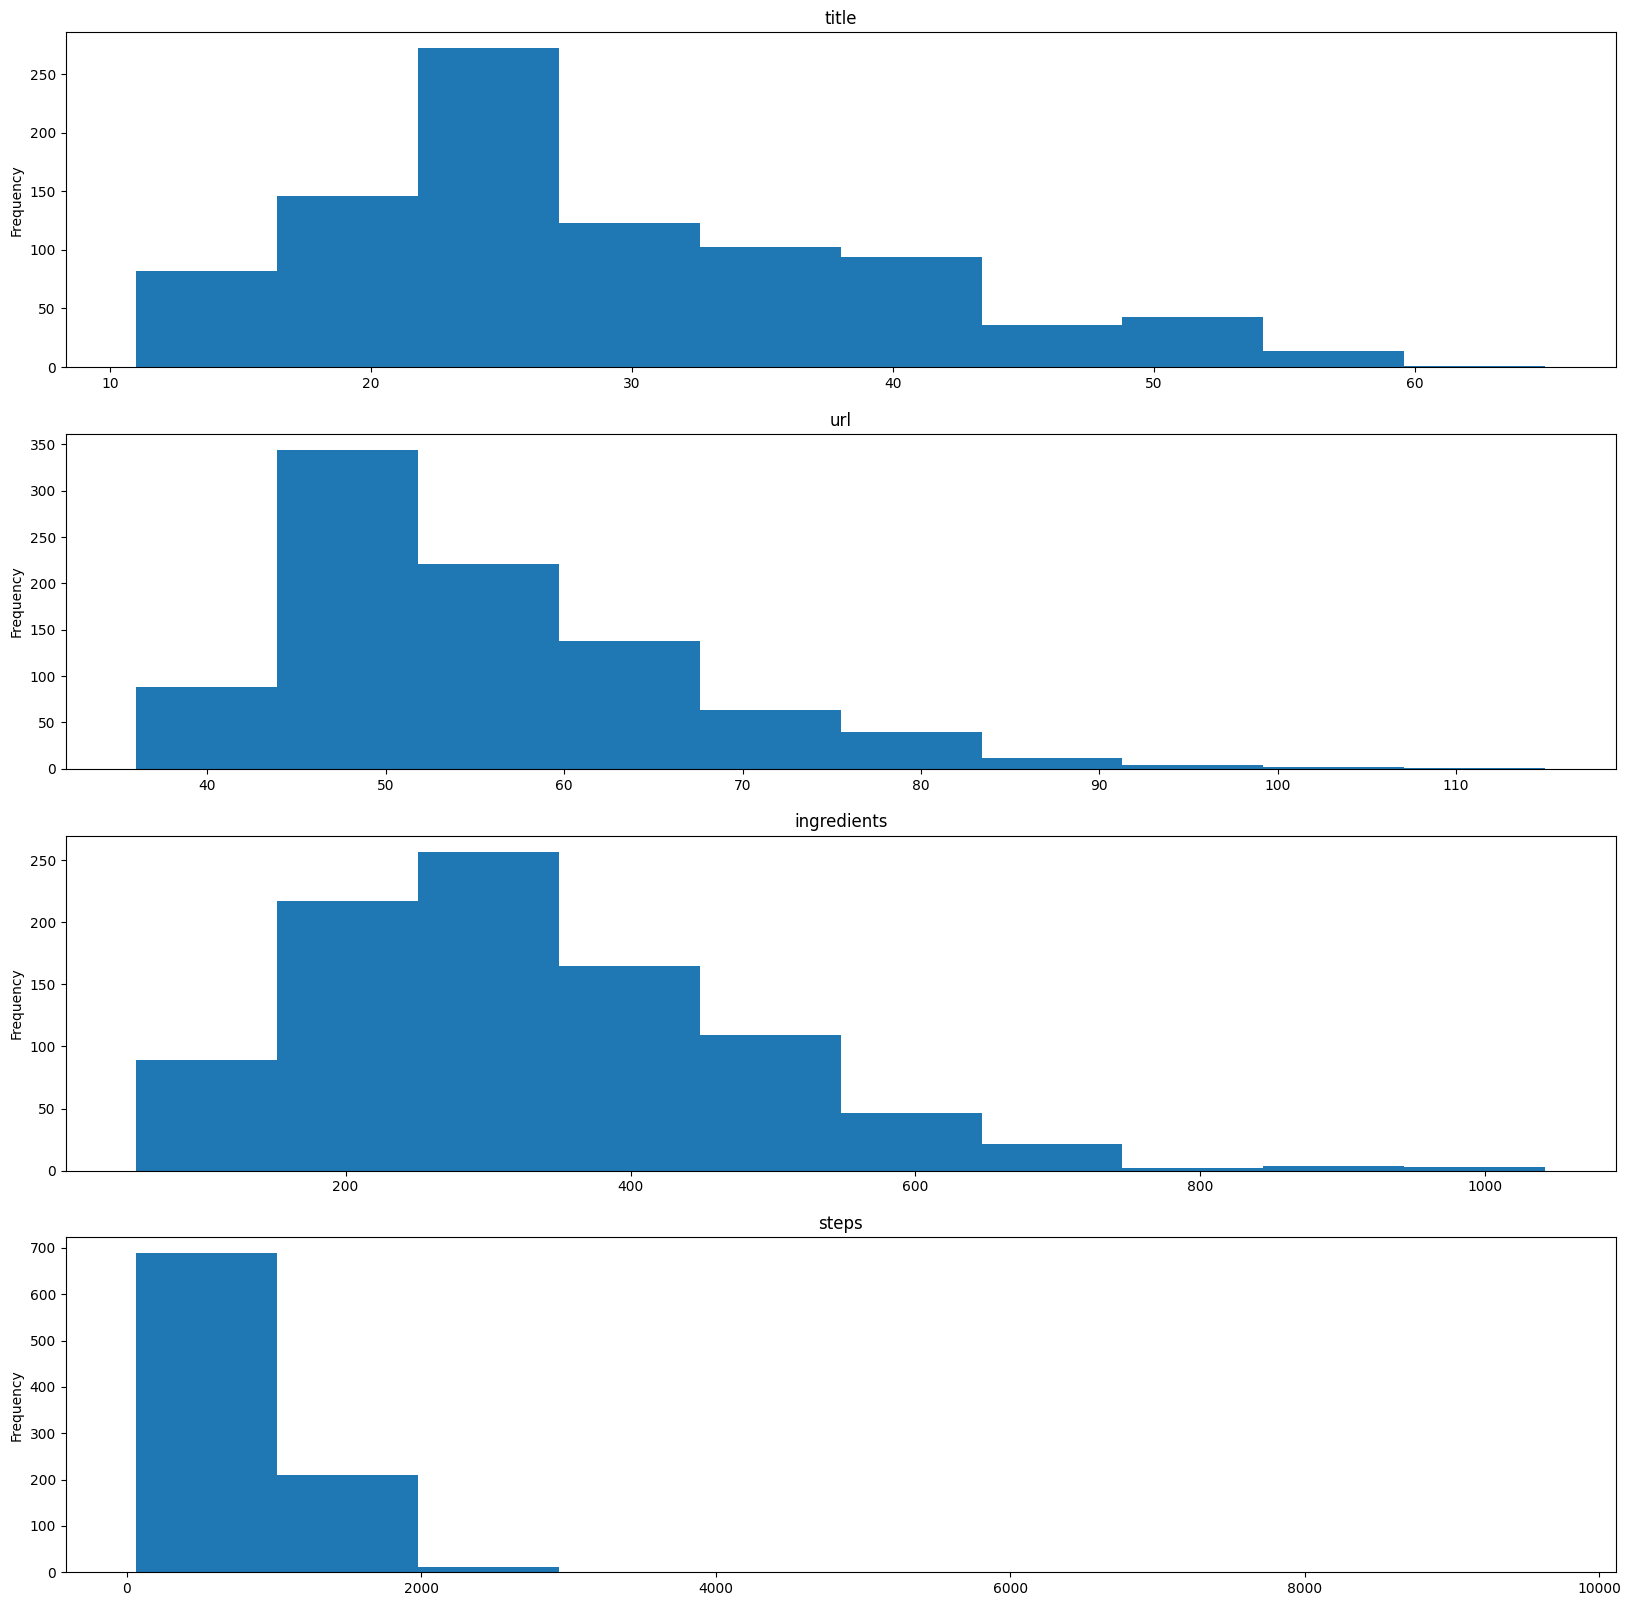

In [11]:
my_colombian.utils_text.plot_length_text()

In [12]:
my_colombian.dropna(inplace=True)

C:\Users\froro\AppData\Local\Temp\ipykernel_5684\3690570697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_colombian.dropna(inplace=True)


In [13]:
my_colombian.ingredients = my_colombian.ingredients.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")

C:\Users\froro\AppData\Local\Temp\ipykernel_5684\1347263670.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  my_colombian.ingredients = my_colombian.ingredients.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")
C:\Users\froro\AppData\Local\Temp\ipykernel_5684\1347263670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_colombian.ingredients = my_colombian.ingredients.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")


In [14]:
my_colombian.steps = my_colombian.steps.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")

C:\Users\froro\AppData\Local\Temp\ipykernel_5684\1254849419.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  my_colombian.steps = my_colombian.steps.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")
C:\Users\froro\AppData\Local\Temp\ipykernel_5684\1254849419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_colombian.steps = my_colombian.steps.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")


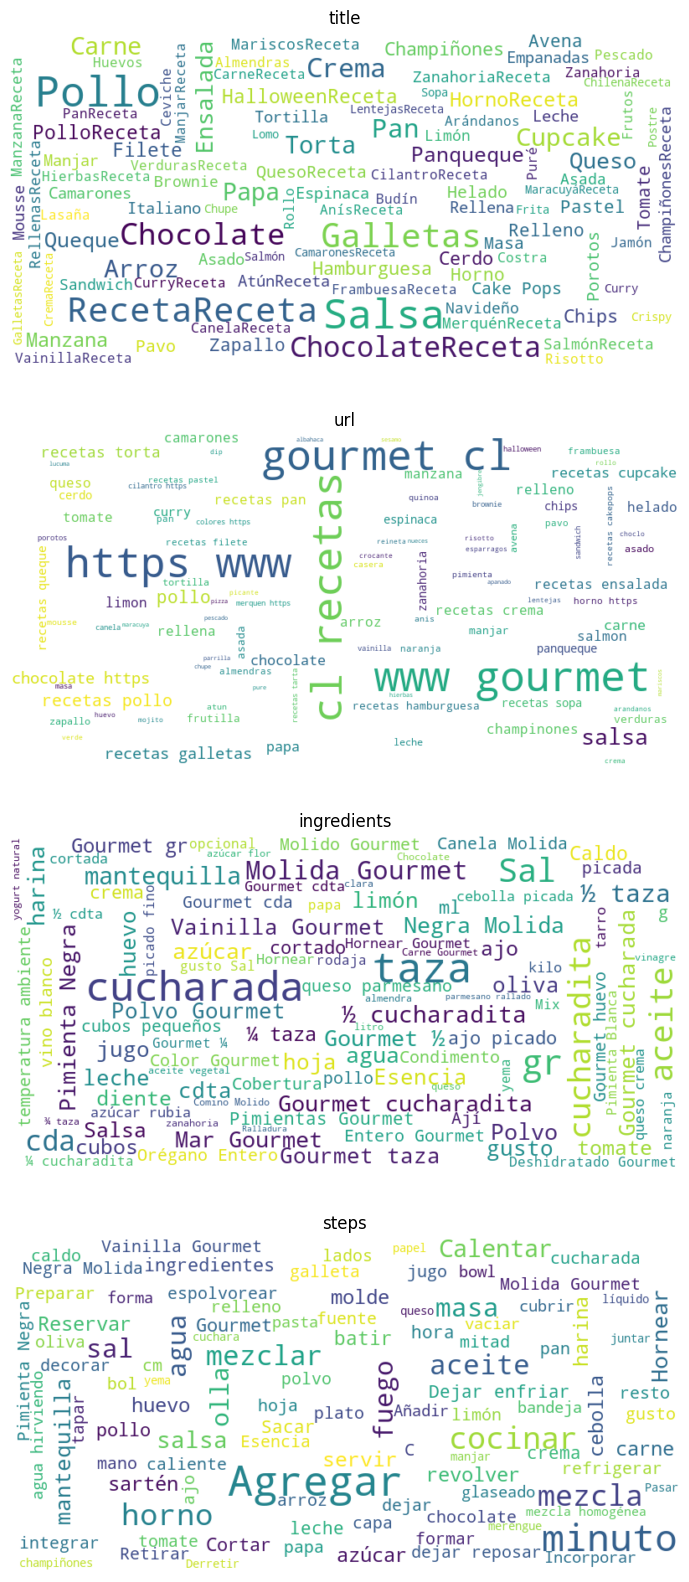

In [15]:
my_colombian.utils_text.plot_word_cloud()

In [16]:
my_colombian["uuid"] = my_colombian.apply(lambda x: uuid.uuid1(), axis=1)
my_colombian

C:\Users\froro\AppData\Local\Temp\ipykernel_5684\1670684951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_colombian["uuid"] = my_colombian.apply(lambda x: uuid.uuid1(), axis=1)


,title,url,ingredients,steps,uuid
0,Barritas de Cereal de Avena con Chips de Choco...,https://www.gourmet.cl/recetas/barritas-de-cer...,Mezcla lista para Galletas de Avena con Chips ...,Precalienta el horno a 170°C En un bowl agrega...,d5893f9b-ea83-11ed-9252-a96d6180cd25
1,Pancakes de Cinnamon Roll,https://www.gourmet.cl/recetas/pancakes-de-cin...,50 gr de mantequilla sin sal derretida 100 gr ...,Mezclar todos los ingredientes y transferirlos...,d5893f9c-ea83-11ed-9423-a96d6180cd25
2,Tacitas de Avena con Crumble Manzana,https://www.gourmet.cl/recetas/tacitas-de-aven...,1 bolsa de Mezcla lista para Galletas de Avena...,Mezclar todos los ingredientes de las tacitas ...,d5893f9d-ea83-11ed-9658-a96d6180cd25
3,Galletas de Avena con Chips de Chocolate y Coco,https://www.gourmet.cl/recetas/galletas-de-ave...,1 bolsa de Mezcla lista para Galletas de Avena...,Mezclar todos los ingredientes en un bowl usan...,d5893f9e-ea83-11ed-9ef0-a96d6180cd25
4,Receta Shawarma de Pollo con Salsa de Ajo Tostado,https://www.gourmet.cl/recetas/shawarma-de-pol...,500 gr de trutro de pollo sin piel ni hueso 1 ...,Mezclar las piezas de pollo con el resto de in...,d5893f9f-ea83-11ed-8280-a96d6180cd25
...,...,...,...,...,...
11,Receta Pan Pita Integral,https://www.gourmet.cl/recetas/pan-pita-integral/,3 tazas de harina integral 2 tazas de harina b...,Juntar ambas harinas en un bol grande. Espolvo...,d58a8629-ea83-11ed-b166-a96d6180cd25
12,Cupcakes de Pie de Limón,https://www.gourmet.cl/recetas/cupcakes-pie-li...,1 taza de azúcar 1/2 taza de mantequilla sin s...,Preparar los quequitos: Calentar el horno a 18...,d58a862a-ea83-11ed-b6d2-a96d6180cd25
13,Cakepops de Nuez,https://www.gourmet.cl/recetas/cakepops-de-nuez/,200 gr de nueces 320 gr de galletas de vino (2...,En una juguera o procesadora de alimentos mole...,d58a862b-ea83-11ed-aacc-a96d6180cd25
14,Receta de Queque de Naranja,https://www.gourmet.cl/recetas/queque-de-naran...,3 tazas de harina sin polvos de hornear 2 cdta...,Calentar el horno 180°C. Enmantequillar y enha...,d58a862c-ea83-11ed-a2c3-a96d6180cd25


In [17]:
my_colombian.to_csv("el_gourmet_chile.csv", index=False)

In [19]:
from newspaper import Article
art = Article("https://ybarraentucocina.com/recetas/y-hoy-pestinos-para-merendar/")
art.download()
art.parse()

In [22]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(art.html)

In [26]:
soup.find("div", {"class": "step-contain"}).text

' Ingredientes\n½ litro de Aceite de Oliva Ybarra\n500 gr. de Harina (mejor de panadería)\n2 cucharadas de Canela en Polvo\n1 Pizca de Sal\n250 ml. de Vino Blanco\nLa Ralladura de una Cáscara de Naranja\n1 Cucharada de Ajonjolí Tostado\n3 Clavos\n250 grs. de Miel\n250 ml. de Agua\n'

## Nestle

In [15]:
nestle = datasets/"Nestle"
csv = nestle.glob("**/*.csv")
nestle = pd.concat(map(pd.read_csv, csv))
nestle.head()

,url,title,ingredients,steps
0,https://www.recetasnestle.com.co/recetas/ensal...,Ensalada de atún con papa,1 libra de papa sabanera sin piel y cortada...,1. En una olla con suficiente agua coloca...
1,https://www.recetasnestle.com.co/recetas/ensal...,Ensalada mexicana con cochinita pibil,1 libra de pierna de cerdo (500 g) 1 s...,"1. Precalienta el horno a 180°C/ 360°F, 1..."
2,https://www.recetasnestle.com.co/recetas/ensal...,"Ensalada con chips de berenjena al horno, y qu...",1 cucharada de aceite (14 g) 1 berenje...,"1. Precalienta el horno a 180°C/360°F, 10..."
3,https://www.recetasnestle.com.co/recetas/ensal...,"Ensalada de pollo a la mandarina, aguacate y m...",2 tazas de jugo de mandarina (500 ml) ...,1. Precalienta el horno a 180°C/360°F 10 ...
4,https://www.recetasnestle.com.co/recetas/ensal...,Ensalada de ahuyama confitada con almíbar de c...,1 cucharadita de jengibre fresco rallado (5...,"1. En una olla pon el agua, la citronela,..."


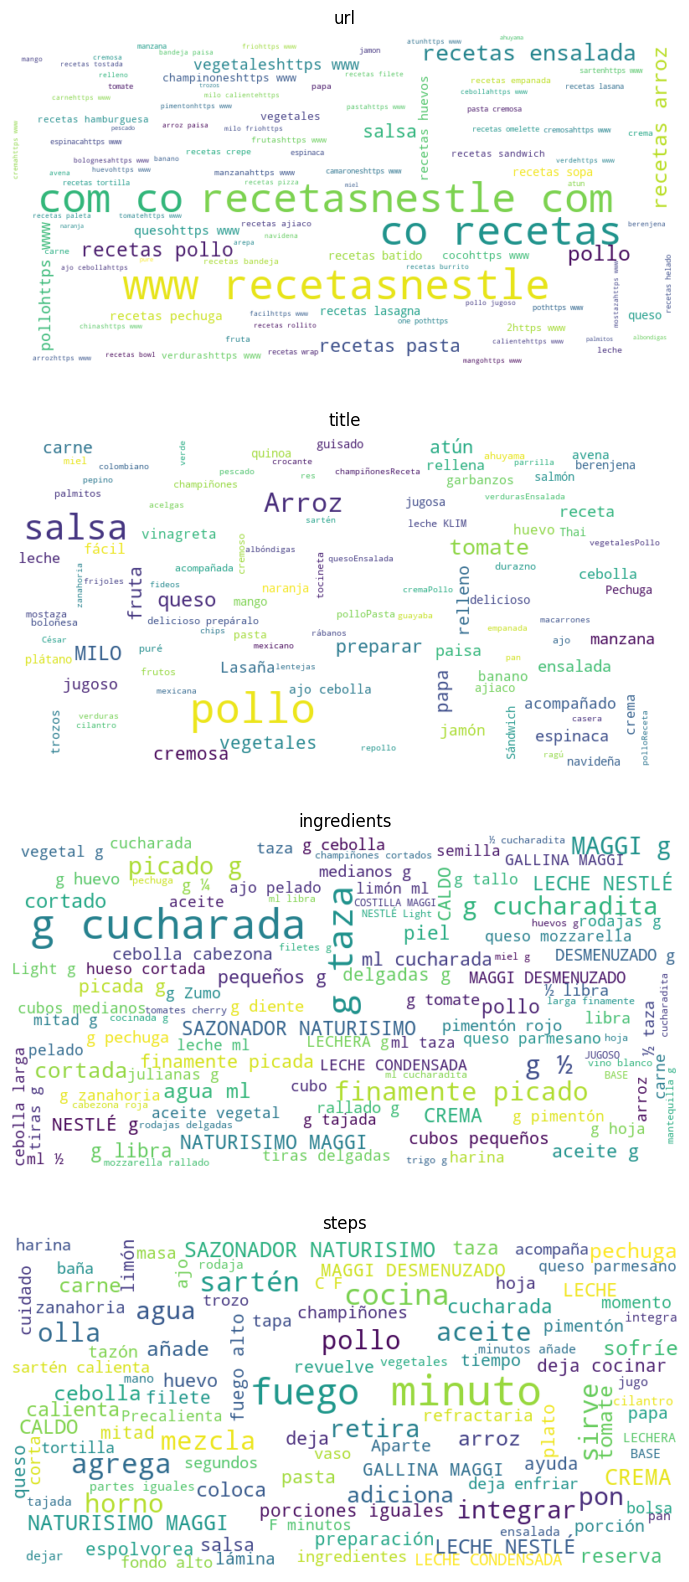

In [16]:
nestle.utils_text.plot_word_cloud()

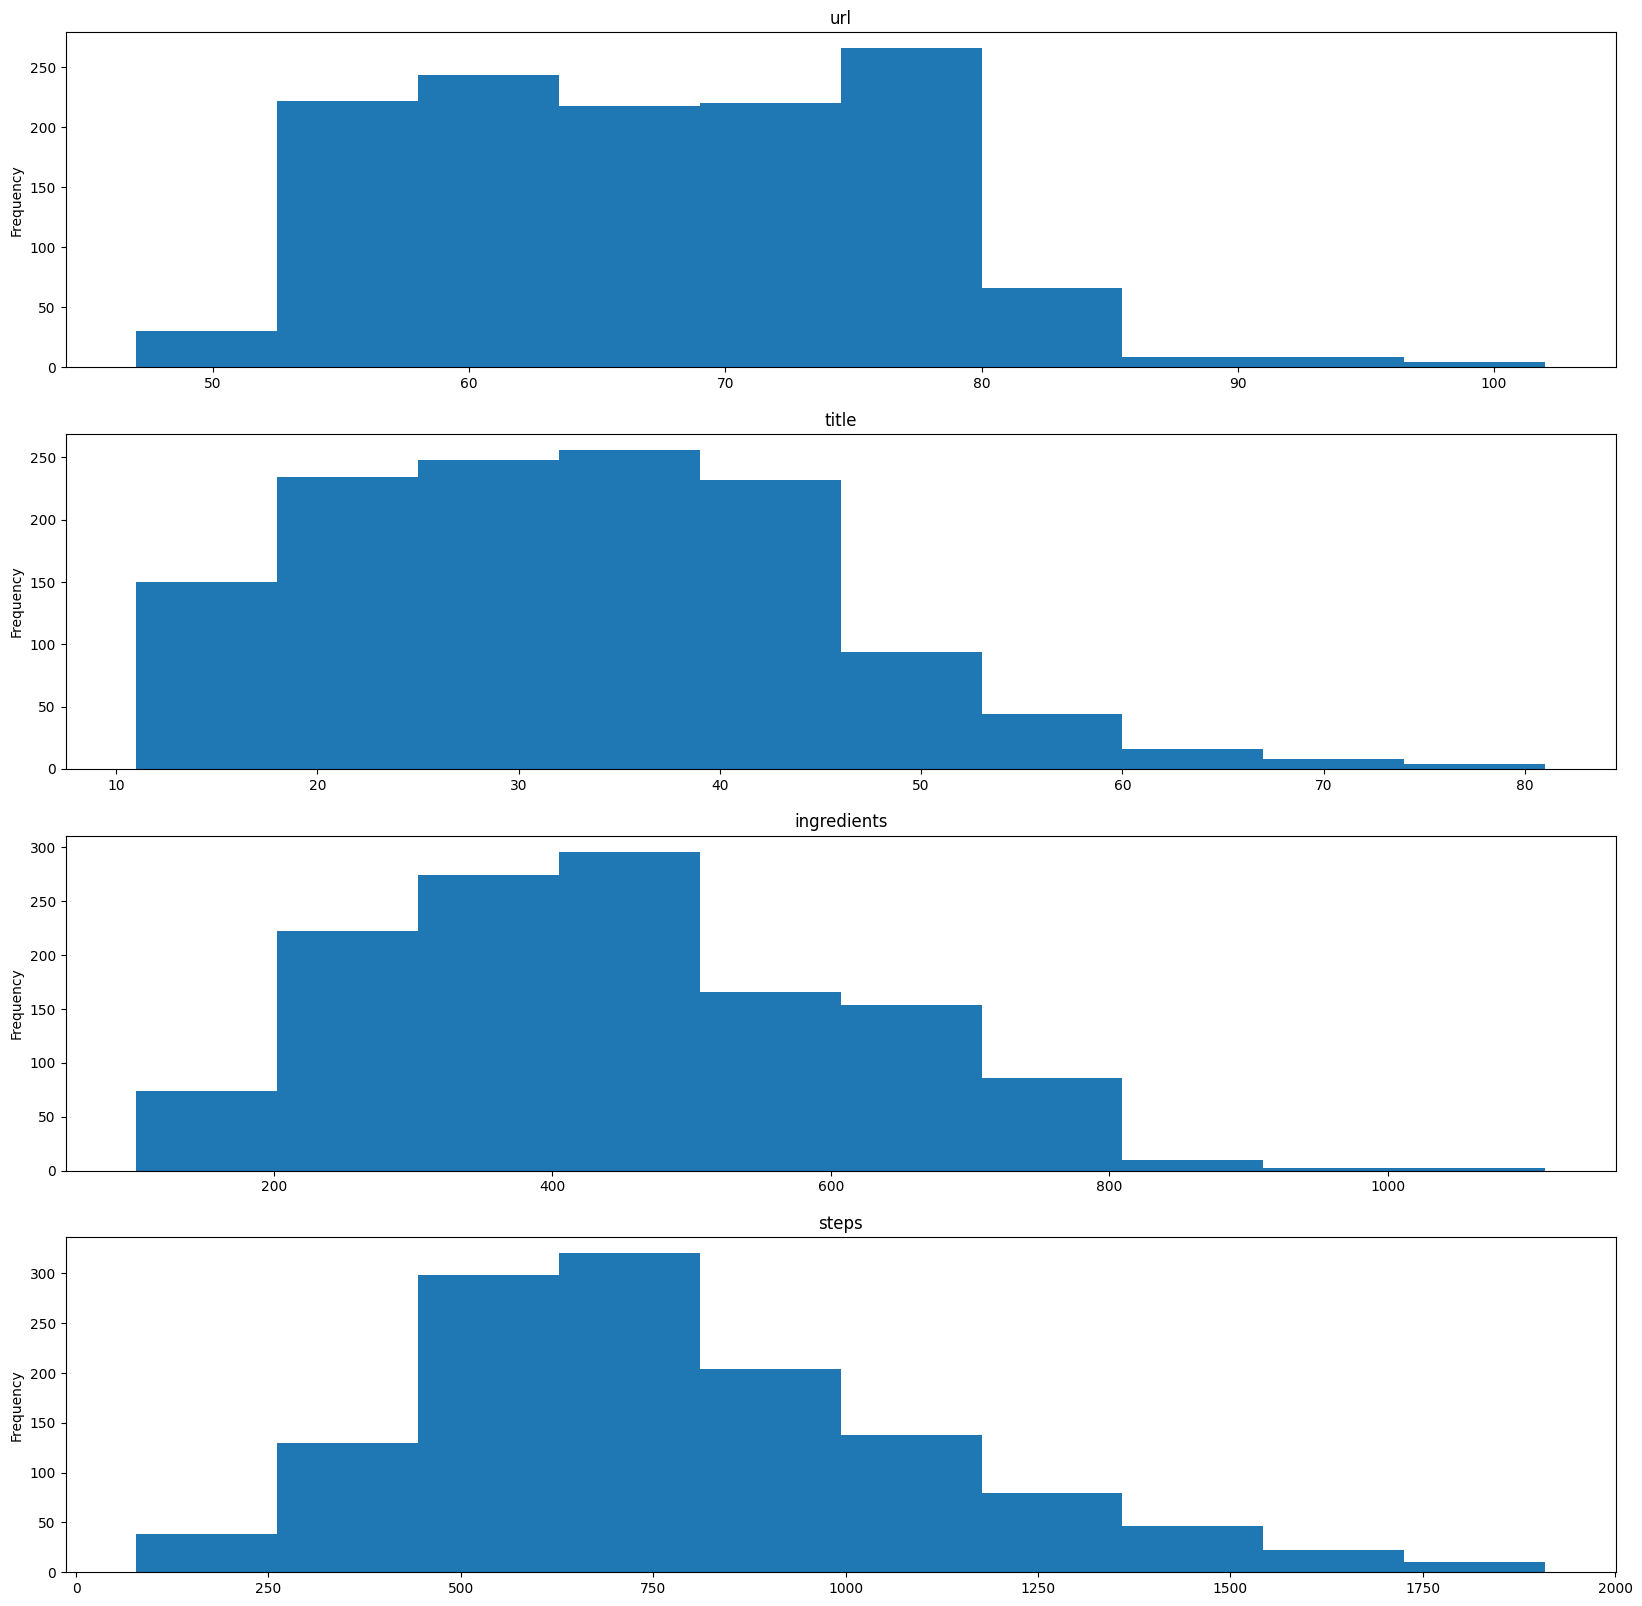

In [17]:
nestle.utils_text.plot_length_text()

In [150]:
nestle.uidd = nestle.apply(lambda x: uuid.uuid4(), axis=1)
nestle

C:\Users\froro\AppData\Local\Temp\ipykernel_17392\1767669200.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  nestle.uidd = nestle.apply(lambda x: uuid.uuid4(), axis=1)


,url,title,ingredients,steps
0,https://www.recetasnestle.com.co/recetas/ensal...,Ensalada de atún con papa,1 libra de papa sabanera sin piel y cortada...,1. En una olla con suficiente agua coloca...
1,https://www.recetasnestle.com.co/recetas/ensal...,Ensalada mexicana con cochinita pibil,1 libra de pierna de cerdo (500 g) 1 s...,"1. Precalienta el horno a 180°C/ 360°F, 1..."
2,https://www.recetasnestle.com.co/recetas/ensal...,"Ensalada con chips de berenjena al horno, y qu...",1 cucharada de aceite (14 g) 1 berenje...,"1. Precalienta el horno a 180°C/360°F, 10..."
3,https://www.recetasnestle.com.co/recetas/ensal...,"Ensalada de pollo a la mandarina, aguacate y m...",2 tazas de jugo de mandarina (500 ml) ...,1. Precalienta el horno a 180°C/360°F 10 ...
4,https://www.recetasnestle.com.co/recetas/ensal...,Ensalada de ahuyama confitada con almíbar de c...,1 cucharadita de jengibre fresco rallado (5...,"1. En una olla pon el agua, la citronela,..."
...,...,...,...,...
638,https://www.recetasnestle.com.co/recetas/sopa-...,Sopa vietnamita de carne con fideos de arroz,1 sobre de CALDO CON COSTILLA MAGGI® DESMEN...,"1. En una olla de fondo alto, añade el ag..."
639,https://www.recetasnestle.com.co/recetas/filet...,Filete de salmón con puré de papa,2 taza de agua (500 ml) 1 libra de pap...,1. En una olla mediana agrega las tazas d...
640,https://www.recetasnestle.com.co/recetas/arroz...,¿Cómo preparar Arroz Atollado?,2 cucharadas aceite de canola (28 g) 1...,1. En una olla de fondo alto calienta el ...
641,https://www.recetasnestle.com.co/recetas/arroz...,Arroz con lentejas y cebollas caramelizadas,3 cucharadas de aceite (42 g) 1 diente...,"1. En una olla amplia a fuego medio, cali..."


## Others

In [18]:
others = datasets/"others"
others_df = pd.read_csv(others/"elgurmet.csv")
others_df.head()

,url,ingrediants,steps,title,uuid
0,https://elgourmet.com/recetas/niguiri-de-tamag...,Huevo 5 Unidades Azúcar 1 ¾ Cucharadas ...,"En una sartén de tamago, colocar un poco de ac...",Niguiri de Tamagoyaki,41351b02-5325-472b-9eea-a4d3d5562886
1,https://elgourmet.com/recetas/sashimi-de-lengu...,Filetes de lenguado 2 Unidades Lima 1 Unida...,Retirar la piel y cortar laminas en un ángulo ...,Sahime de lenguado,e187e250-219f-4695-856f-e67045924f8a
2,https://elgourmet.com/recetas/alfajores-de-cho...,MASA Extracto de malta 40 g Almidón de maíz...,Batir la manteca pomada con el azúcar hasta bl...,Alfajores De Chocolate,cf868cc7-a33e-4be5-b492-5c8be6079cb7
3,https://elgourmet.com/recetas/alfajores-de-mai...,Manteca 200 g Yemas 10 unidades Coco rall...,Batir la manteca blanda con el azúcar impalpab...,Alfajores De Maicena Tradicional,6e213728-160d-4844-a97e-2b1b423cfac4
4,https://elgourmet.com/recetas/semifrio-de-fram...,Yogur griego 375 g Agua de rosas 10 g Azú...,PROCEDIMIENTO Hidratar la grenetina con el agu...,Semifrío de Frambuesa y Yogur,47fb7150-0086-41cc-bd2a-cad58741e456


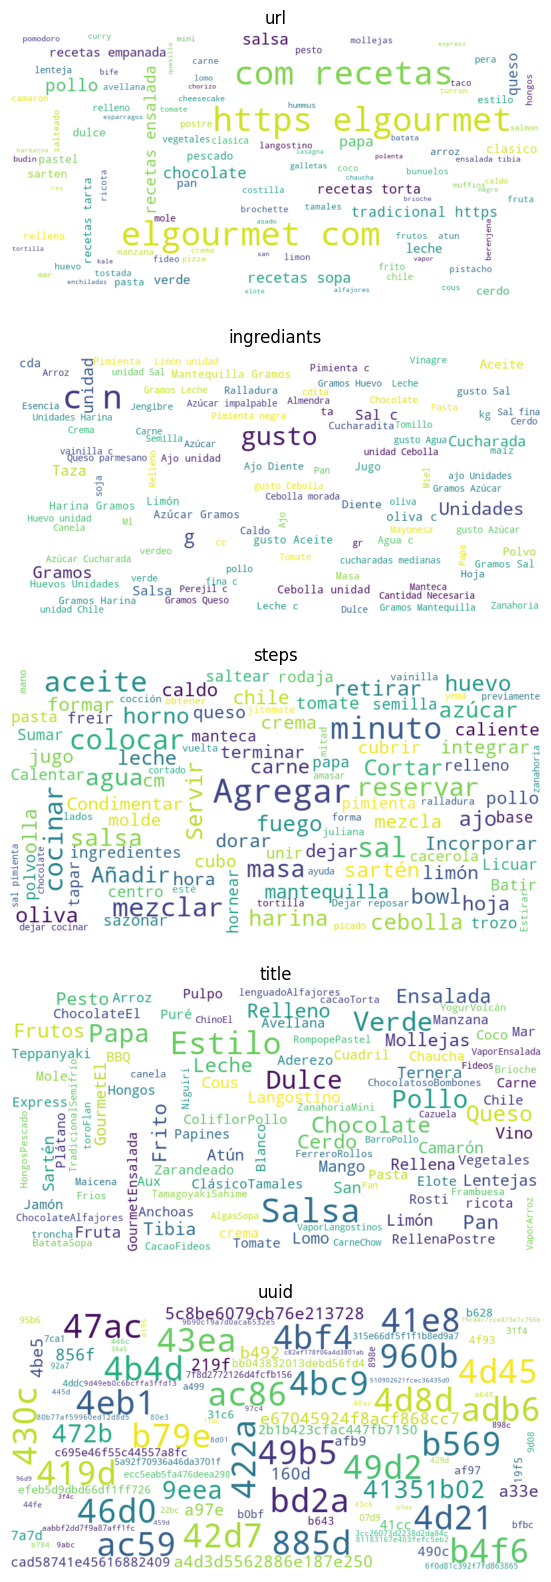

In [19]:
others_df.utils_text.plot_word_cloud()

## Recetas de Pais

In [20]:
pais_dataset = datasets/"Recetas"
pais_df = pd.concat(map(pd.read_csv, pais_dataset.glob("*.csv")))
pais_df.head()

,url,title,date,ingredients,steps
0,https://www.recetas.com/rollitos-de-pavo-relle...,Rollitos de pavo rellenos,NaN,6 finas rebanadas de pavo 130 gr. de ternera p...,Rollitos de pavo rellenos\n\nPoner en un tazó...
1,https://www.recetas.com/tiramisu-a-la-naranja....,Tiramisú a la naranja,NaN,400 gr. de mascarpone 200 gr. de vainillas 200...,Tiramisú a la naranja\n\nRomper los huevos se...
2,https://www.recetas.com/mayonesa-de-naranja.html,Mayonesa de naranja,NaN,NaN,"Mayonesa de naranja\n\nLavar la naranja, rall..."
3,https://www.recetas.com/pastel-ganache-de-choc...,Pastel ganache de chocolate,NaN,Para el pastel : 300 gr. de chocolate amargo a...,Pastel ganache de chocolate\n\nDerretir la ma...
4,https://www.recetas.com/pizza-con-tomates-cher...,"Pizza con tomates cherry, burrata y cebolla mo...",NaN,1 bollo de masa para pizza de 280 gr. Albahaca...,"Pizza con tomates cherry, burrata y cebolla m..."


In [21]:
pais_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6787 entries, 0 to 23
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          6787 non-null   object 
 1   title        6787 non-null   object 
 2   date         0 non-null      float64
 3   ingredients  5597 non-null   object 
 4   steps        6551 non-null   object 
dtypes: float64(1), object(4)
memory usage: 318.1+ KB


In [22]:
pais_df.dropna(inplace=True, subset=["ingredients"])

C:\Users\froro\AppData\Local\Temp\ipykernel_17964\3223170977.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pais_df.ingredients = pais_df.ingredients.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")
C:\Users\froro\AppData\Local\Temp\ipykernel_17964\3223170977.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  pais_df.steps = pais_df.steps.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")


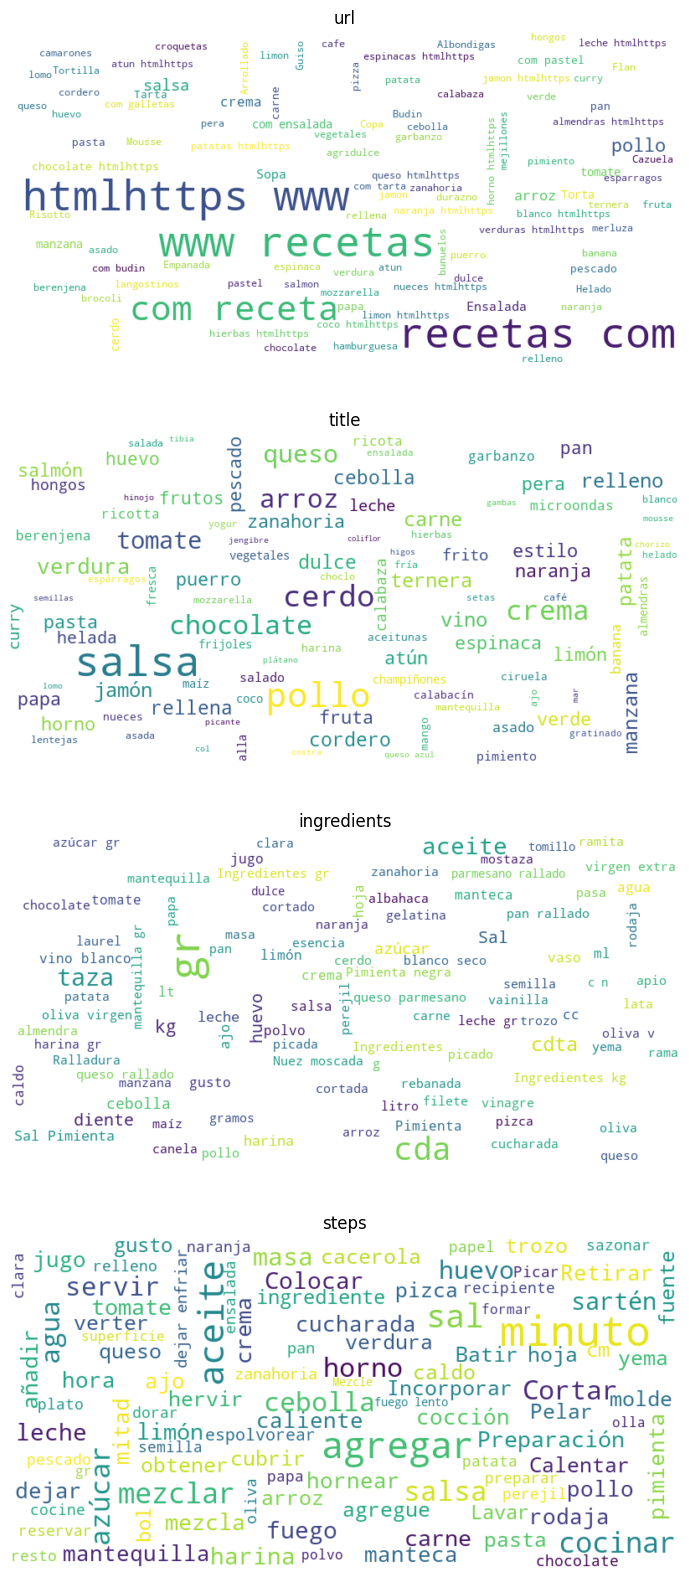

In [23]:
pais_df.ingredients = pais_df.ingredients.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")
pais_df.steps = pais_df.steps.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")
pais_df.utils_text.plot_word_cloud()

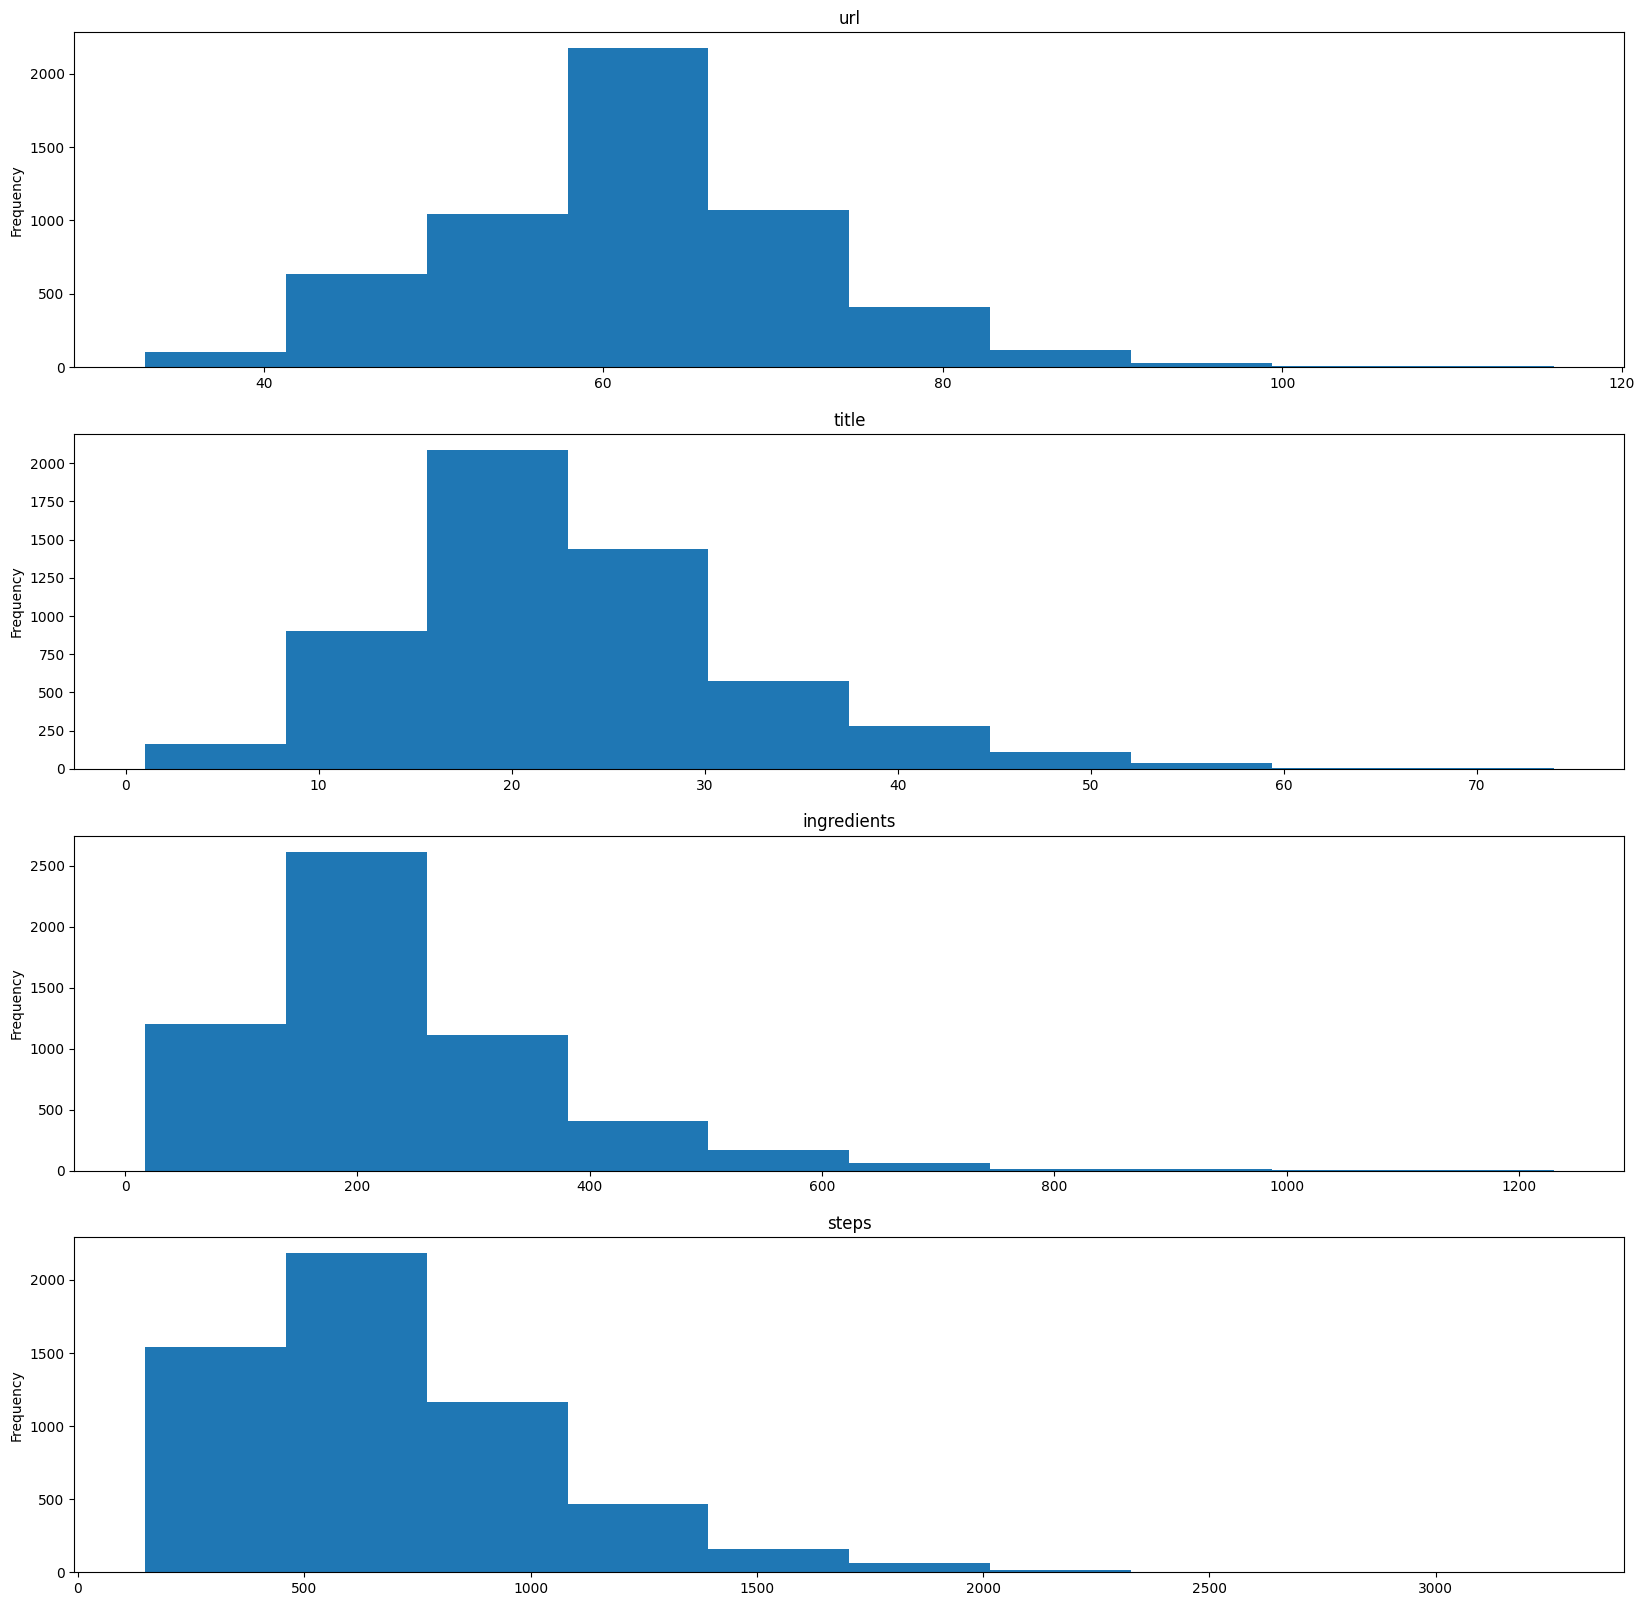

In [24]:
pais_df.utils_text.plot_length_text()

In [26]:
pais_df["uuid"] = pais_df.apply(lambda x: uuid.uuid4(), axis=1)

In [28]:
pais_df = pais_df[["uuid", "url", "ingredients", "steps", "title"]]
pais_df.head()

,uuid,url,ingredients,steps,title
0,72e53a50-5d61-46da-9ce3-01178ade68b1,https://www.recetas.com/rollitos-de-pavo-relle...,6 finas rebanadas de pavo 130 gr. de ternera p...,Rollitos de pavo rellenos Poner en un tazón g...,Rollitos de pavo rellenos
1,a3ff3b1d-1fdb-4da9-a4e6-8cb6bbf2c865,https://www.recetas.com/tiramisu-a-la-naranja....,400 gr. de mascarpone 200 gr. de vainillas 200...,Tiramisú a la naranja Romper los huevos separ...,Tiramisú a la naranja
3,ecc2311e-08d3-459c-82ab-40ffab1e6bcc,https://www.recetas.com/pastel-ganache-de-choc...,Para el pastel : 300 gr. de chocolate amargo a...,Pastel ganache de chocolate Derretir la mante...,Pastel ganache de chocolate
4,456870ef-eb56-4d81-acd7-6ef997f8491a,https://www.recetas.com/pizza-con-tomates-cher...,1 bollo de masa para pizza de 280 gr. Albahaca...,"Pizza con tomates cherry, burrata y cebolla m...","Pizza con tomates cherry, burrata y cebolla mo..."
5,6348601f-a11a-4eb7-b504-8f877af1dac0,https://www.recetas.com/brocoli-horneado-cruji...,300 gr. de brócoli 50 gr. de aceite de oliva e...,Brócoli horneado crujiente Precalentar el hor...,Brócoli horneado crujiente


## Recetas1

In [40]:
dataset_val = (datasets/"Recetas1").glob("**/*.csv")
data_df = pd.concat(map(pd.read_csv, dataset_val))


In [41]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21122 entries, 0 to 49
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         21122 non-null  object 
 1   intro         12970 non-null  object 
 2   order         21122 non-null  object 
 3   votes         15608 non-null  object 
 4   comensales    13954 non-null  object 
 5   duración      13952 non-null  object 
 6   para          11944 non-null  object 
 7   dificultad    15488 non-null  object 
 8   coste         0 non-null      float64
 9   types         14620 non-null  object 
 10  ingredientes  20909 non-null  object 
 11  url           21122 non-null  object 
dtypes: float64(1), object(11)
memory usage: 2.1+ MB


In [42]:
data_df.dropna(inplace=True, subset=["ingredientes"])

In [43]:
import ast
data_df["ingredientes"] = data_df["ingredientes"].apply(lambda x: ast.literal_eval(x)).apply(lambda x: " ".join(x)).str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")
data_df["order"] = data_df["order"].apply(lambda x: ast.literal_eval(x)).apply(lambda x: " ".join(x)).str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")

C:\Users\froro\AppData\Local\Temp\ipykernel_17964\3317945053.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df["ingredientes"] = data_df["ingredientes"].apply(lambda x: ast.literal_eval(x)).apply(lambda x: " ".join(x)).str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")
C:\Users\froro\AppData\Local\Temp\ipykernel_17964\3317945053.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df["order"] = data_df["order"].apply(lambda x: ast.literal_eval(x)).apply(lambda x: " ".join(x)).str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")


In [44]:
data_df["uuid"] = data_df.apply(lambda x: uuid.uuid4(), axis=1)

In [45]:
data_df = data_df[["uuid", "url", "ingredientes", "order", "title"]]
data_df.rename(columns={"ingredientes": "ingredients", "order": "steps"}, inplace=True)

In [46]:
data_df.ingredients = data_df.ingredients.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")

C:\Users\froro\AppData\Local\Temp\ipykernel_17964\2742007453.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df.ingredients = data_df.ingredients.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")


In [47]:
data_df.steps = data_df.steps.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")

C:\Users\froro\AppData\Local\Temp\ipykernel_17964\2699328045.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df.steps = data_df.steps.str.replace(r"\s+", " ").str.replace("\n", " ").str.replace("\t", " ")


In [48]:
df = pd.concat([my_colombian, nestle, pais_df, data_df])

In [49]:
df

,title,url,ingredients,steps,uuid
0,Arepas de Queso,https://www.mycolombianrecipes.com/es/arepas-d...,1 taza de harina de arepa blanca o amarilla 1 ...,"Combine la harina de maíz, agua caliente, el q...",9d6f0034-e1fa-11ed-aaf9-a96d6180cd25
1,Sudado de Pollo,https://www.mycolombianrecipes.com/es/sudado-d...,8 muslos de pollo sin la piel 1 cucharada de a...,"En una olla grande, caliente el aceite vegetal...",9d6f0035-e1fa-11ed-b227-a96d6180cd25
2,Sancocho Trifásico,https://www.mycolombianrecipes.com/es/sancocho...,1 taza de cebolla picada 1 pimientón rojo fina...,"Coloque la cebolla, el pimientón, el ajo y el ...",9d6f0036-e1fa-11ed-a2f6-a96d6180cd25
3,Sudado de Posta o Muchacho,https://www.mycolombianrecipes.com/es/sudado-d...,"1 posta o muchacho de 3 a 4 libras, cortada en...","En una olla grande ponga la carne, el caldo, e...",9d6f0037-e1fa-11ed-88f8-a96d6180cd25
4,Sopa de Lentejas Colombiana,https://www.mycolombianrecipes.com/es/sopa-de-...,1 cucharadita de aceite vegetal 1 taza de chor...,Cocinar el chorizo en el aceite en una olla gr...,9d6f0038-e1fa-11ed-8c48-a96d6180cd25
...,...,...,...,...,...
45,Berenjenas rellenas de carne picada y bechamel...,https://www.recetasgratis.net/receta-de-berenj...,4 Berenjenas 2 Zanahorias 1 Cebolla 1 diente d...,1 Empezaremos a preparar estas berenjenas rell...,ed6ae6fe-42f1-41f4-8190-a07bad1b0a91
46,Puré de patatas con queso y huevo,https://www.recetasgratis.net/receta-de-pure-d...,2 Patatas 2 Huevos 100 gramos de Parmesano 2 l...,"1 Cocemos las patatas y, una vez listas, las p...",9c87a78c-fac7-484f-bf80-cc8d8589e7ba
47,Rollitos de calabacín rellenos de jamón y queso,https://www.recetasgratis.net/receta-de-rollit...,½ Calabacín 100 gramos de Jamón cocido 100 gra...,1 Lo primero que debemos hacer es lavar bien e...,ade6faa4-b530-4ec0-a6cc-99f66651131d
48,Calabacín relleno de quinoa,https://www.recetasgratis.net/receta-de-calaba...,4 Calabacines 1 Cebolla 1 Pimiento verde 1 Pim...,1 Lo primero que tenemos que hacer para elabor...,5f66cc33-bc21-4936-8493-71fedb9b0e47


In [51]:
df.shape

(28238, 5)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28238 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        28238 non-null  object
 1   url          28238 non-null  object
 2   ingredients  28238 non-null  object
 3   steps        28238 non-null  object
 4   uuid         28238 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [53]:
df.uuid = df.uuid.apply(lambda x: uuid.uuid4())

In [134]:
df.to_csv(datasets/"dataset.csv", index=False)